# Data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories;
from make_json import parameter_names;

Neighboring files:
Removed JSON file: ANNEALING_SLOPE/parameters_1.json
Removed JSON file: ANNEALING_SLOPE/parameters_5.json
Removed JSON file: ANNEALING_SLOPE/parameters_4.json
Removed JSON file: ANNEALING_SLOPE/parameters_2.json
Removed JSON file: ANNEALING_SLOPE/parameters_6.json
Removed JSON file: ANNEALING_SLOPE/parameters_3.json
Removed JSON file: JUMP_SLOPE/parameters_10.json
Removed JSON file: JUMP_SLOPE/parameters_20.json
Removed JSON file: JUMP_SLOPE/parameters_1.json
Removed JSON file: JUMP_SLOPE/parameters_50.json
Removed JSON file: JUMP_SLOPE/parameters_100.json
Removed JSON file: LEARNING_RATE_HL/parameters_1e-05.json
Removed JSON file: LEARNING_RATE_HL/parameters_2e-05.json
Removed JSON file: LEARNING_RATE_HL/parameters_5e-05.json
Removed JSON file: LEARNING_RATE_HL/parameters_3e-05.json
Removed JSON file: LEARNING_RATE_HL/parameters_0.0001.json
Removed JSON file: LEARNING_RATE_HL/parameters_0.json
Removed JSON file: RA_SIG_SLOPE/parameters_22.json
Removed JSON file: RA_

In [2]:
wanted_directories = ["BG_NOISE", "LEARNING_RATE_RL", "REWARD_WINDOW", "LEARNING_RATE_HL","TARGET_WIDTH","ANNEALING", "JUMP_MID", "JUMP_SLOPE", "JUMP_FACTOR", "RA_SIG_SLOPE", "balance_factor","RA_NOISE"]#["ANNEALING", "BG_NOISE", "LEARNING_RATE_HL", "LEARNING_RATE_RL", "RA_NOISE", "N_BG_CLUSTERS", "N_DISTRACTORS", "REWARD_WINDOW", "TARGET_WIDTH"]                                       

In [3]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data_cut = {}
data_no_cut = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall_returns_cut"):   
            filepath = os.path.join(directory, filename)
            data_cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("overall_returns_nocut"):
            filepath = os.path.join(directory, filename)
            data_no_cut[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data_cut.keys())
print(data_no_cut.keys())
print(parameter_values)

ANNEALING_SLOPE
JUMP_SLOPE
LEARNING_RATE_HL
RA_SIG_SLOPE
TARGET_WIDTH
contours
JUMP_MID
BG_NOISE
N_DISTRACTORS
WEIGHT_JUMP
balance_factor
ANNEALING_b4_HL_new
LEARNING_RATE_RL
ANNEALING_MID_DECAY
LEARNING_RATE_HL_b4_HL_new
ANNEALING
N_BG_CLUSTERS
RA_NOISE
ANNEALING_MID
BG_SIG_SLOPE
JUMP_FACTOR
REWARD_WINDOW
dict_keys(['JUMP_SLOPE', 'LEARNING_RATE_HL', 'RA_SIG_SLOPE', 'TARGET_WIDTH', 'JUMP_MID', 'BG_NOISE', 'N_DISTRACTORS', 'WEIGHT_JUMP', 'balance_factor', 'LEARNING_RATE_RL', 'ANNEALING_MID_DECAY', 'ANNEALING', 'RA_NOISE', 'ANNEALING_MID', 'BG_SIG_SLOPE', 'JUMP_FACTOR', 'REWARD_WINDOW'])
dict_keys(['JUMP_SLOPE', 'LEARNING_RATE_HL', 'RA_SIG_SLOPE', 'TARGET_WIDTH', 'JUMP_MID', 'BG_NOISE', 'N_DISTRACTORS', 'WEIGHT_JUMP', 'balance_factor', 'LEARNING_RATE_RL', 'ANNEALING_MID_DECAY', 'ANNEALING', 'RA_NOISE', 'ANNEALING_MID', 'BG_SIG_SLOPE', 'JUMP_FACTOR', 'REWARD_WINDOW'])
{'ANNEALING_SLOPE': array([1., 2., 3., 4., 5., 6.]), 'JUMP_SLOPE': array([  1.,  10.,  50.,  20., 100.]), 'LEARNING_RATE_H

In [4]:
# print(data_cut[neighbouring_directories[0]])
# print(data_no_cut[neighbouring_directories[0]])

In [5]:
# data_cut["RA_SIG_SLOPE"].shape
# wanted_directories = ["WEIGHT_JUMP"]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:

# for index, directory in enumerate(neighbouring_directories):
    # if directory in wanted_directories:
    #     param = directory
    #     returns_cut = 100 * data_cut[directory]
    #     returns_no_cut = 100 * data_no_cut[directory]

    #     parameter_values_sorted = sorted(parameter_values[directory])
    #     sorted_indices = np.argsort(parameter_values[directory])
        
    #     returns_cut = returns_cut[:, sorted_indices]
    #     returns_no_cut = returns_no_cut[:, sorted_indices]

    #     n_values = len(parameter_values_sorted)

    #     # Calculate percentage above threshold
    #     above_threshold_cut = np.zeros(n_values)
    #     above_threshold_no_cut = np.zeros(n_values)
    #     for i in range(n_values):
    #         above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
    #         above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

    #     above_threshold_cut /= returns_cut.shape[0]
    #     above_threshold_no_cut /= returns_no_cut.shape[0]

    #     # Prepare data for seaborn
    #     data = []
    #     labels = []
    #     group = []

    #     for i in range(n_values):
    #         # Append "after lesion" data
    #         data.extend(returns_cut[:, i])
    #         labels.extend([parameter_values_sorted[i]] * returns_cut.shape[0])
    #         group.extend(['After Lesion'] * returns_cut.shape[0])

    #         # Append "before lesion" data
    #         data.extend(returns_no_cut[:, i])
    #         labels.extend([parameter_values_sorted[i]] * returns_no_cut.shape[0])
    #         group.extend(['Before Lesion'] * returns_no_cut.shape[0])

    #     # Plot violin plot
    #     plt.figure(figsize=(12, 6))
    #     ax = sns.violinplot(
    #         x=labels, y=data, hue=group, split=True, bw=0.9,
    #         palette={'Before Lesion': 'skyblue', 'After Lesion': 'darkblue'}, alpha=0.8
    #     )
    #     sns.stripplot(x=labels, y=data, hue=group, dodge=True, color='black', alpha=0.5, size=3, jitter=True)   

    #     # Annotate above-threshold percentages
    #     for i, val in enumerate(parameter_values_sorted):
    #         x_offset = 0.2  # adjust x position for spacing
    #         ax.text(i + x_offset, 72, f"Cut: {100 * above_threshold_cut[i]:.1f}%", color='orange', ha='center', fontsize=8)
    #         ax.text(i - x_offset, 72, f"No: {100 * above_threshold_no_cut[i]:.1f}%", color='indigo', ha='center', fontsize=8)
    #     plt.title(f'Robustness', fontsize=20)
    #     plt.axhline(70, color='black', linestyle='--', label='Threshold = 70')
    #     plt.xlabel(param, fontsize = 15)
    #     plt.ylabel('Return %', fontsize = 15)
    #     plt.ylim(0, 100)
    #     plt.legend()
    #     plt.tight_layout()
    #     plt.show()


In [8]:
def plot_results_violin(returns_cut, returns_no_cut, params, label, xlabels = None):
    returns_cut = np.array(returns_cut) * 1
    returns_no_cut = np.array(returns_no_cut) * 1
    sorted_params = sorted(params)
    sorted_indices = np.argsort(params)
    
    returns_cut = returns_cut[:, sorted_indices]
    returns_no_cut = returns_no_cut[:, sorted_indices]
    sorted_params = np.array(params)[sorted_indices]

    n_values = len(sorted_params)
    above_threshold = np.zeros(n_values)
    above_threshold2 = np.zeros(n_values)
    
    # Flatten data for seaborn
    data = []
    data2 = []
    labels = []

    for i in range(n_values):
        col = returns_cut[:, i]
        col2 = returns_no_cut[:, i]
        above_threshold[i] = np.sum(col > 0.7) / len(col)
        above_threshold2[i] = np.sum(col2 > 0.7) / len(col2) 

        data.extend(col)
        data2.extend(col2)
        labels.extend([sorted_params[i]] * len(col))

    # Plotting
    plt.figure(figsize=(2.5*n_values, 6))
    # ax = sns.violinplot(x=labels, y=data, inner=None, color='skyblue', alpha=0.6, split=False)   
    ax = sns.violinplot(x=labels, y=data2, inner='quartile', color='darkslateblue', fill = False, alpha=1, split=False , inner_kws={'linewidth': 1, 'color': 'darkslateblue', 'alpha': 1})  

    sns.stripplot(x=labels, y=data, size=2, color='black', alpha=0.3, jitter=0.2)
    plt.axhline(0.7, 0.05, 0.95, color='red', linestyle='--', label='Global Maxima \n threshold')

    # Add threshold line and annotations
    for i in range(n_values):
        # plt.text(i, 95, f"{100 * above_threshold[i]:.1f}%", ha='center', va='bottom', fontsize=8, color='blue')
        plt.text(i+0.25, 0.73, f"{100 * above_threshold2[i]:.0f}%", ha='center', va='bottom', fontsize=13, color='red')
        plt.vlines(i+0.15, 0.71,0.99, color = 'red')
        plt.hlines(0.71, i+0.12,i+0.17, color = 'red')
        plt.hlines(0.99, i+0.12,i+0.17, color = 'red')
    # plt.text(0.5,0.5,f'', color='blue', label = '% of trials finding \n global maxima')
    # plt.axhline(0.70, xmin = 0.05, xmax=0.95,color='red', linestyle='--', label='Threshold = 70')
    plt.xlabel(label, fontsize=14)
    plt.ylabel('Final Performance', fontsize=18)
    plt.ylim(0, 1)
    plt.yticks([0,1],fontsize = 12)
    # remove left and top spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)    
    if xlabels is not None:
        plt.xticks(ticks=[0, 1], labels=xlabels, fontsize=12)   
    # plt.title(f"Variability of performance", fontsize=20)
    plt.legend(loc ='lower right', fontsize=14)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_3593664/3701528262.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


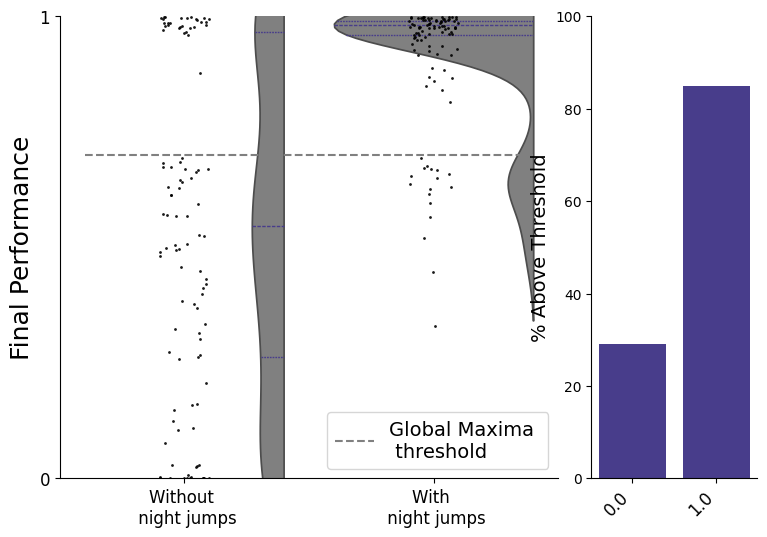

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results_violin(returns_cut, returns_no_cut, params, label, xlabels=None):
    returns_cut = np.array(returns_cut) * 1
    returns_no_cut = np.array(returns_no_cut) * 1
    sorted_params = sorted(params)
    sorted_indices = np.argsort(params)
    
    returns_cut = returns_cut[:, sorted_indices]
    returns_no_cut = returns_no_cut[:, sorted_indices]
    sorted_params = np.array(params)[sorted_indices]

    n_values = len(sorted_params)
    above_threshold = np.zeros(n_values)
    above_threshold2 = np.zeros(n_values)
    
    # Flatten data for seaborn
    data = []
    data2 = []
    labels_list = []

    for i in range(n_values):
        col = returns_cut[:, i]
        col2 = returns_no_cut[:, i]
        above_threshold[i] = np.sum(col > 0.7) / len(col)
        above_threshold2[i] = np.sum(col2 > 0.7) / len(col2)

        data.extend(col)
        data2.extend(col2)
        labels_list.extend([sorted_params[i]] * len(col))

    # Create subplots: 2 columns, violin on the left (larger), bar on the right (narrow)
    fig = plt.figure(figsize=(3*n_values + 3, 6))
    gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], wspace=0.1)

    # Violin plot (left)
    ax1 = fig.add_subplot(gs[0, 0])
    sns.violinplot(x=labels_list, y=data2, inner='quartile', color='grey', 
        density_norm='area', bw_adjust=1, fill=True, alpha=1, split=True, 
        inner_kws={'linewidth': 1, 'color': 'darkslateblue', 'alpha': 1}, ax=ax1)
    sns.stripplot(x=labels_list, y=data, size=2, color='black', alpha=0.9, jitter=0.1, ax=ax1)

    ax1.axhline(0.7, 0.05, 0.95, color='grey', linestyle='--', label='Global Maxima \n threshold')

    # for i in range(n_values):
    #     ax1.text(i+0.25, 0.73, f"{100 * above_threshold2[i]:.0f}%", ha='center', va='bottom', fontsize=13, color='red')
    #     ax1.vlines(i+0.15, 0.71, 0.99, color='red')
    #     ax1.hlines([0.71, 0.99], i+0.12, i+0.17, color='red')

    ax1.set_xlabel(label, fontsize=14)
    ax1.set_ylabel('Final Performance', fontsize=18)
    ax1.set_ylim(0, 1)
    ax1.set_yticks([0, 1])
    ax1.set_yticklabels([0, 1], fontsize=12)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    if xlabels is not None:
        ax1.set_xticks([0, 1])
        ax1.set_xticklabels(xlabels, fontsize=12)
    ax1.legend(loc='lower right', fontsize=14)

    # Bar plot (right)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(range(n_values), above_threshold2*100, color='darkslateblue', alpha=1)
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('% Above Threshold', fontsize=14)
    ax2.set_xticks(range(n_values))
    ax2.set_xticklabels(sorted_params, rotation=45, ha='right', fontsize=12)
    # ax2.set_title('% Above Threshold', fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_results_violin(data_cut["ANNEALING"], data_no_cut["ANNEALING"], parameter_values["ANNEALING"], "", xlabels = ["Without \n night jumps", "With \n night jumps"])

/tmp/ipykernel_3593664/1617637854.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


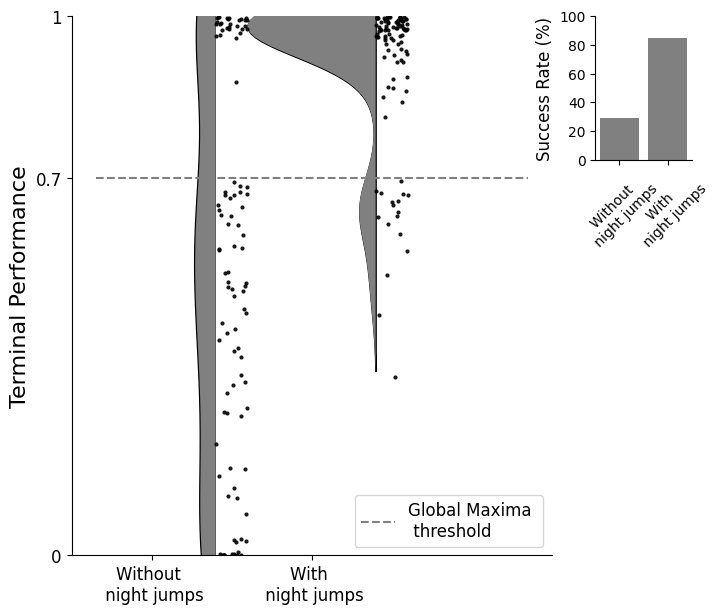

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

purples_last = 'grey' #plt.cm.Greys(0.5)

def plot_results_violin(returns_cut, returns_no_cut, params, label, xlabels=None):
    returns_cut = np.array(returns_cut)
    returns_no_cut = np.array(returns_no_cut)
    sorted_indices = np.argsort(params)
    sorted_params = np.array(params)[sorted_indices]

    returns_cut = returns_cut[:, sorted_indices]
    returns_no_cut = returns_no_cut[:, sorted_indices]

    n_values = len(sorted_params)
    above_threshold2 = np.zeros(n_values)

    data = []
    data2 = []
    labels_list = []

    for i in range(n_values):
        col = returns_cut[:, i]
        col2 = returns_no_cut[:, i]
        above_threshold2[i] = np.sum(col2 > 0.7) / len(col2)

        data.extend(col)
        data2.extend(col2)
        labels_list.extend([sorted_params[i]] * len(col))

    # Create figure with custom layout
    fig = plt.figure(figsize=(3 * n_values + 2, 7))
    gs = fig.add_gridspec(2, 2, width_ratios=[6, 1.2], height_ratios=[2, 5], wspace=0.2 - 0.12*n_values/5, hspace=0.15)

    # Left large violin plot (occupies both rows in column 0)
    ax1 = fig.add_subplot(gs[:, 0])
    parts = sns.violinplot(x=np.array(labels_list)-1, y=data2, inner=None, color='none', linewidth=1, ax=ax1, split=True, hue_order=['right', 'left'])
    strip = sns.stripplot(x=np.array(labels_list), y=data, size=3, color='black', alpha=0.9, jitter=0.1, ax=ax1)
    ax1.axhline(0.7, 0.05, 0.95, color='grey', linestyle='--', label='Global Maxima \n threshold')
    for i, pc in enumerate(parts.collections):
        path = pc.get_paths()[0]
        r_low = mpatches.Rectangle((i-0.4, 0), width=0.8, height=0.7, facecolor='grey', alpha=1)
        r_low.set_clip_path(path, transform=ax1.transData)
        ax1.add_patch(r_low)

        r_high = mpatches.Rectangle((i-0.4, 0.7), width=0.8, height=0.3, facecolor=purples_last, alpha=1)
        r_high.set_clip_path(path, transform=ax1.transData)
        ax1.add_patch(r_high)

    ax1.set_xlabel(label, fontsize=16)
    ax1.set_ylabel('Terminal Performance', fontsize=16)
    ax1.set_ylim(0, 1)
    ax1.set_yticks([0, 0.7, 1])
    ax1.set_yticklabels(['0', '0.7', '1'], fontsize=12)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    if xlabels is not None:
        ax1.set_xticks(range(n_values))
        ax1.set_xticklabels(xlabels, fontsize=12)
    else:
        ax1.set_xticklabels(sorted_params, fontsize=12)
    ax1.legend(loc='lower right', fontsize=12)

    for coll in strip.collections:
        offsets = coll.get_offsets()
        new_offsets = []
        for x, y in offsets:
            new_offsets.append((x - 0.5, y))  # shift to the left
        coll.set_offsets(new_offsets)

    # Bottom-right bar plot
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(range(n_values), above_threshold2 * 100, color=purples_last, alpha=1)
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Success Rate (%)', fontsize=12)
    ax2.set_xticks(range(n_values))
    ax2.set_xticklabels(xlabels, rotation=45, ha='center', fontsize=10) if xlabels is not None else ax2.set_xticklabels(sorted_params, rotation=0, ha='center', fontsize=10)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example call
plot_results_violin(
    data_cut["ANNEALING"], 
    data_no_cut["ANNEALING"], 
    parameter_values["ANNEALING"], 
    "", 
    xlabels=["Without \n night jumps", "With \n night jumps"]
)


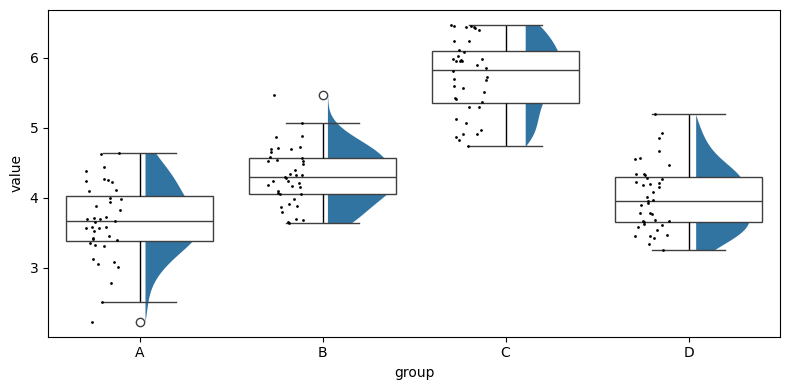

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
np.random.seed(0)
df = pd.DataFrame({
    "group": np.repeat(["A","B","C","D"], 40),
    "value": np.concatenate([np.random.normal(m,0.5,40)
                             for m in [3.5,4.5,5.5,4]])
})

fig, ax = plt.subplots(figsize=(8,4))

# Draw boxplots (center)
sns.boxplot(x="group", y="value", data=df,
            showcaps=True, boxprops={'facecolor':'white'},
            whiskerprops={'color':'black'}, zorder=2, ax=ax)

# Draw full violins first
sns.violinplot(x="group", y="value", data=df,
               inner=None, color='C0', linewidth=0,
               cut=0, ax=ax)

# Clip violins to right half
for c in ax.collections:
    if hasattr(c, "get_paths"):
        for path in c.get_paths():
            verts = path.vertices
            x_center = np.median(verts[:,0])
            verts[:,0] = np.where(verts[:,0] < x_center,
                                  x_center, verts[:,0])

# Draw stripplot and shift to left side
strip = sns.stripplot(x="group", y="value", data=df,
                      color='black', size=2, jitter=0.1, ax=ax)

for coll in strip.collections:
    offsets = coll.get_offsets()
    new_offsets = []
    for x, y in offsets:
        new_offsets.append((x - 0.2, y))  # shift to the left
    coll.set_offsets(new_offsets)

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

purples_last = plt.cm.Purples(0.5)

def plot_results_violin_single(returns, params, label, xlabels=None):
    """
    Plot violin plot with a single results array instead of two separate arrays
    """
    returns = np.array(returns)
    sorted_indices = np.argsort(params)
    sorted_params = np.array(params)[sorted_indices]

    returns = returns[:, sorted_indices]

    n_values = len(sorted_params)
    above_threshold = np.zeros(n_values)

    data = []
    labels_list = []

    for i in range(n_values):
        col = returns[:, i]
        above_threshold[i] = np.sum(col > 0.7) / len(col)

        data.extend(col)
        labels_list.extend([sorted_params[i]] * len(col))

    # Create figure with custom layout
    fig = plt.figure(figsize=(3 * n_values + 2, 7))
    gs = fig.add_gridspec(2, 2, width_ratios=[6, 1.2], height_ratios=[2, 5], wspace=0.2 - 0.12*n_values/5, hspace=0.15)

    # Left large violin plot (occupies both rows in column 0)
    ax1 = fig.add_subplot(gs[:, 0])
    parts = sns.violinplot(x=labels_list, y=data, inner=None, color='none', linewidth=1, ax=ax1)
    sns.stripplot(x=labels_list, y=data, size=3, color='black', alpha=0.9, jitter=0.1, ax=ax1)

    ax1.axhline(0.7, 0.05, 0.95, color='grey', linestyle='--', label='Global Maxima \n threshold')

    for i, pc in enumerate(parts.collections):
        path = pc.get_paths()[0]
        r_low = mpatches.Rectangle((i-0.4, 0), width=0.8, height=0.7, facecolor='grey', alpha=1)
        r_low.set_clip_path(path, transform=ax1.transData)
        ax1.add_patch(r_low)

        r_high = mpatches.Rectangle((i-0.4, 0.7), width=0.8, height=0.3, facecolor=purples_last, alpha=1)
        r_high.set_clip_path(path, transform=ax1.transData)
        ax1.add_patch(r_high)

    ax1.set_xlabel(label, fontsize=16)
    ax1.set_ylabel('Terminal Performance', fontsize=16)
    ax1.set_ylim(0, 1)
    ax1.set_yticks([0, 0.7, 1])
    ax1.set_yticklabels(['0', '0.7', '1'], fontsize=12)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    if xlabels is not None:
        ax1.set_xticks(range(n_values))
        ax1.set_xticklabels(xlabels, fontsize=12)
    else:
        ax1.set_xticklabels(sorted_params, fontsize=12)
    ax1.legend(loc='lower right', fontsize=12)

    # Bottom-right bar plot
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(range(n_values), above_threshold * 100, color=purples_last, alpha=1)
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Success Rate (%)', fontsize=12)
    # ax2.set_xticks(range(n_values))
    # ax2.set_xticklabels(sorted_params, rotation=0, ha='center', fontsize=10)
    ax2.set_xticklabels(xlabels, rotation=0, ha='center', fontsize=10) if xlabels is not None else ax2.set_xticklabels(sorted_params, rotation=0, ha='center', fontsize=10)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Example usage with single array:
# plot_results_violin_single(single_results_array, [param1, param2, param3], "Parameter Label", xlabels=["Label1", "Label2", "Label3"])

/tmp/ipykernel_3593664/410283158.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


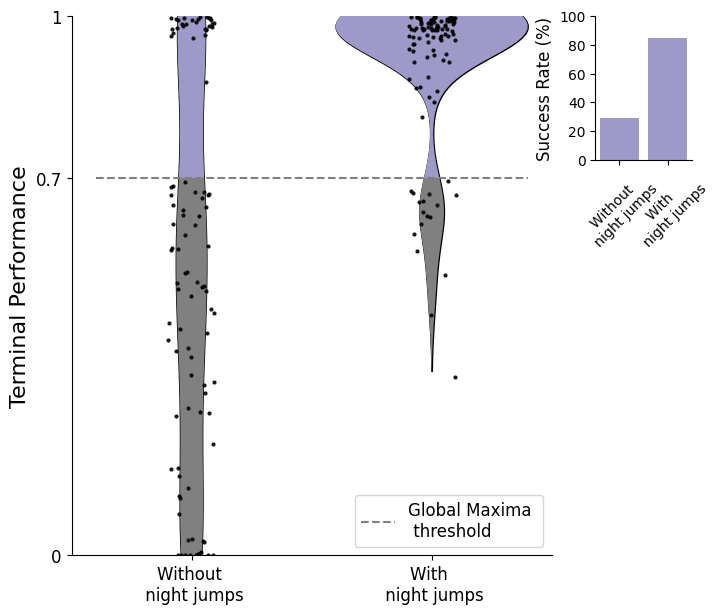

In [12]:
plot_results_violin(data_cut["ANNEALING"], data_no_cut["ANNEALING"], parameter_values["ANNEALING"], "", xlabels = ["Without \n night jumps", "With \n night jumps"])

/tmp/ipykernel_3593664/410283158.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_params, fontsize=12)
/tmp/ipykernel_3593664/410283158.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


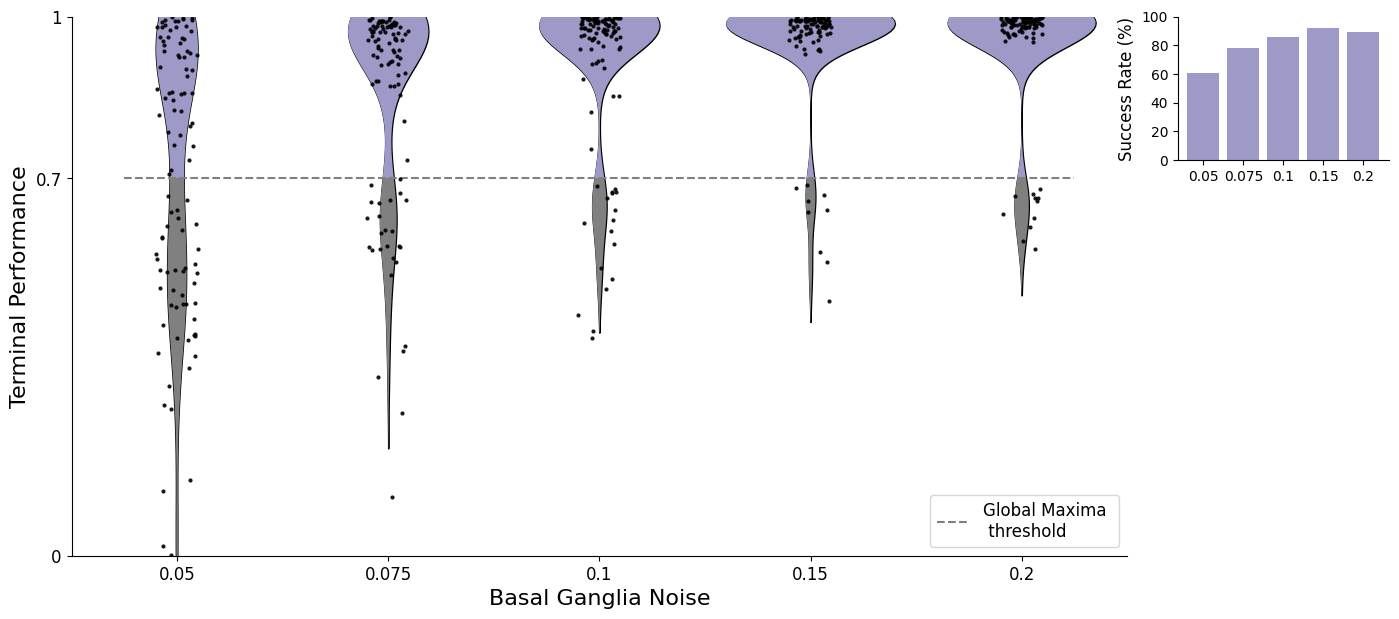

In [13]:
plot_results_violin(data_cut["BG_NOISE"], data_no_cut["BG_NOISE"], parameter_values["BG_NOISE"], "Basal Ganglia Noise" )

/tmp/ipykernel_3593664/410283158.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_params, fontsize=12)
/tmp/ipykernel_3593664/410283158.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


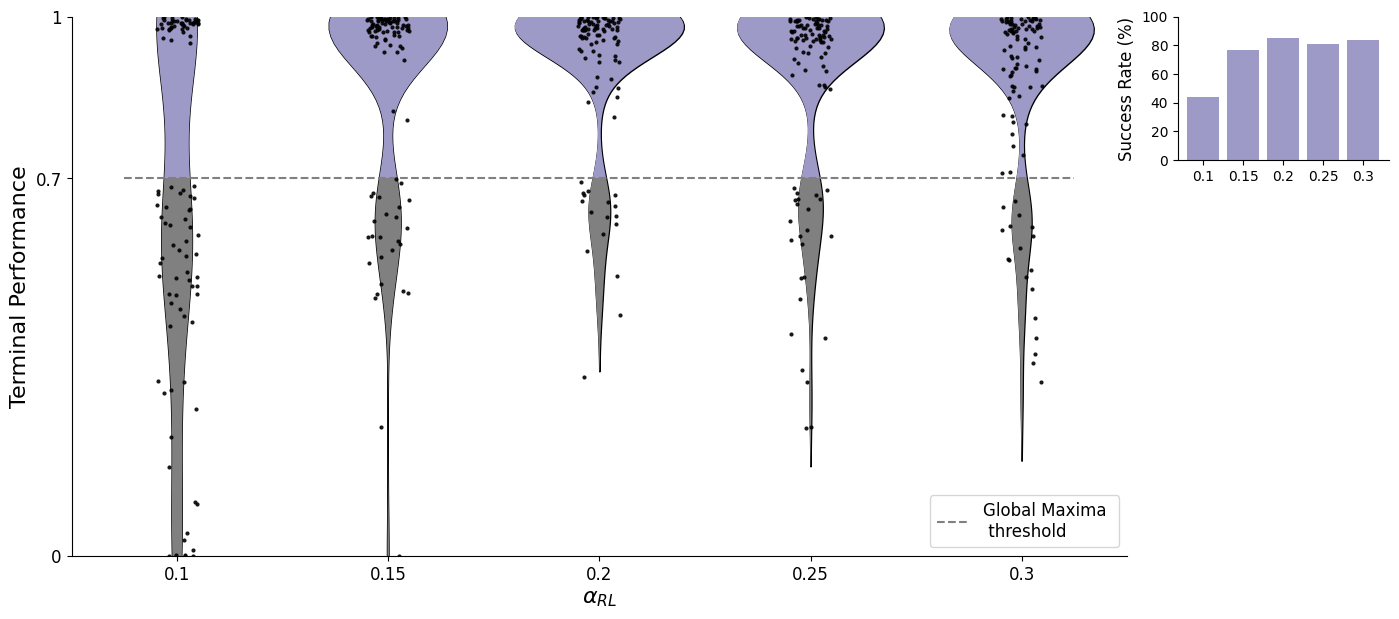

In [14]:
plot_results_violin(data_cut["LEARNING_RATE_RL"], data_no_cut["LEARNING_RATE_RL"], parameter_values["LEARNING_RATE_RL"], r"$\alpha_{RL}$" )

/tmp/ipykernel_3593664/410283158.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_params, fontsize=12)
/tmp/ipykernel_3593664/410283158.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


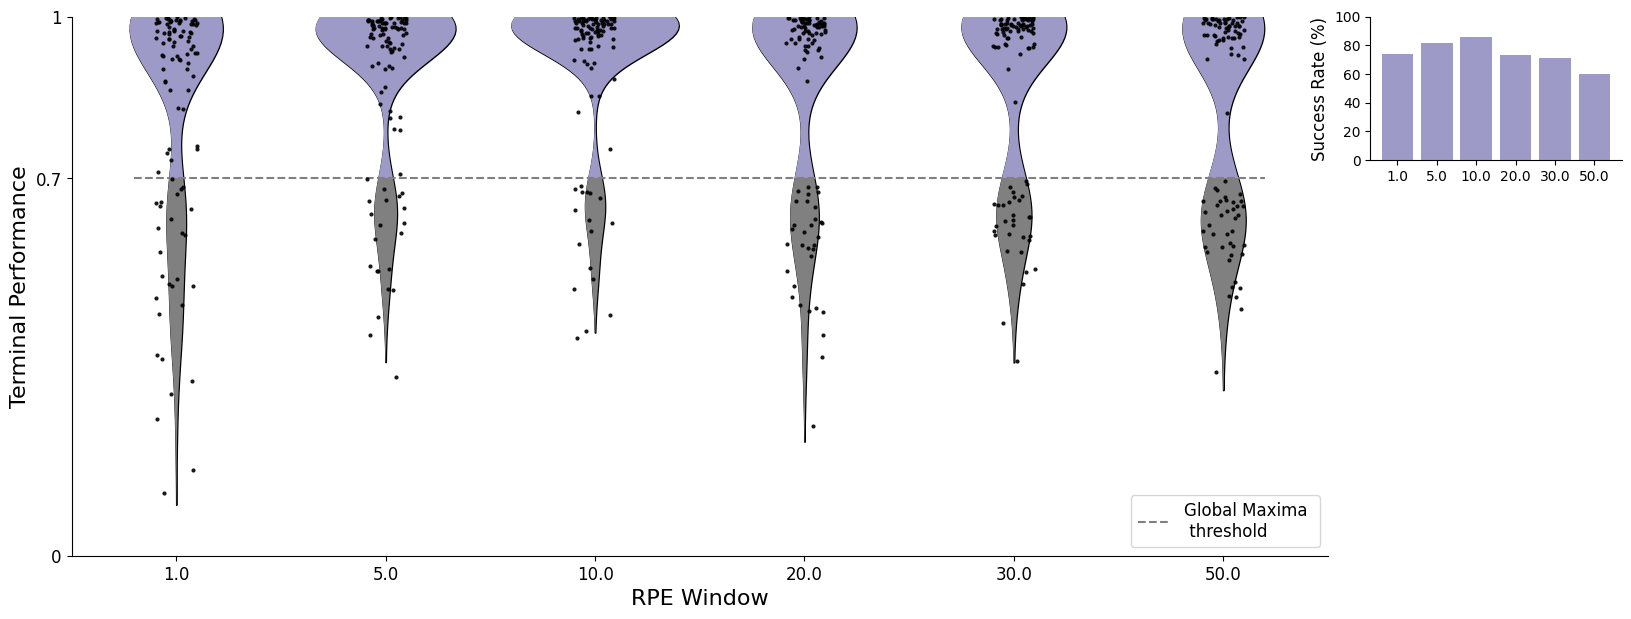

In [15]:
plot_results_violin(data_cut["REWARD_WINDOW"], data_no_cut["REWARD_WINDOW"], parameter_values["REWARD_WINDOW"], "RPE Window")

/tmp/ipykernel_3593664/410283158.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_params, fontsize=12)
/tmp/ipykernel_3593664/410283158.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


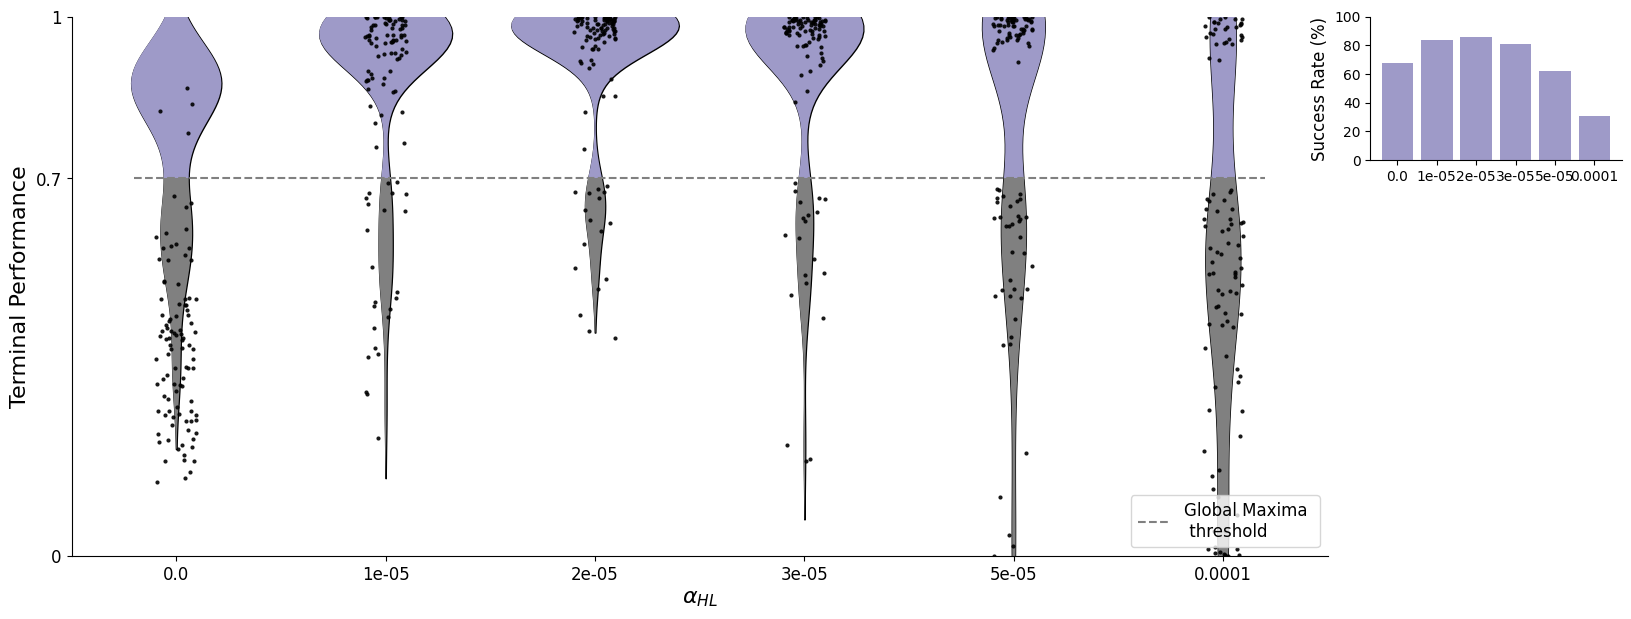

In [16]:
plot_results_violin(data_cut["LEARNING_RATE_HL"], data_no_cut["LEARNING_RATE_HL"], parameter_values["LEARNING_RATE_HL"], r"$\alpha_{HL}$" )

/tmp/ipykernel_3593664/410283158.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


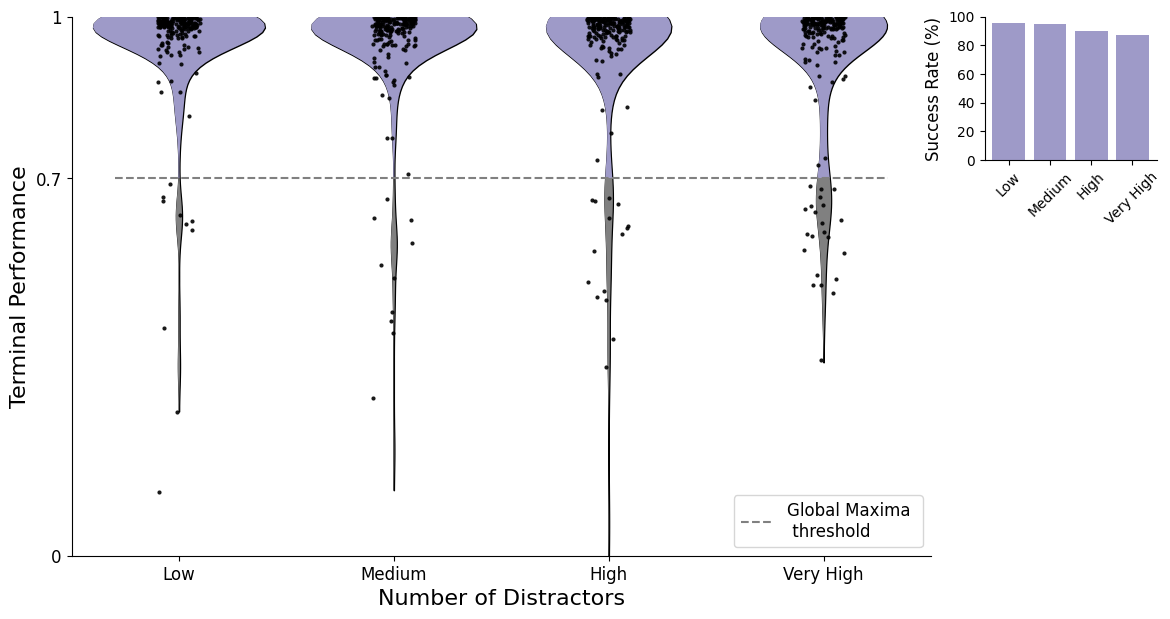

In [17]:
plot_results_violin(data_cut["N_DISTRACTORS"], data_no_cut["N_DISTRACTORS"], parameter_values["N_DISTRACTORS"], "Number of Distractors", xlabels=["Low", "Medium", "High", "Very High"])

/tmp/ipykernel_3593664/410283158.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_params, fontsize=12)
/tmp/ipykernel_3593664/410283158.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


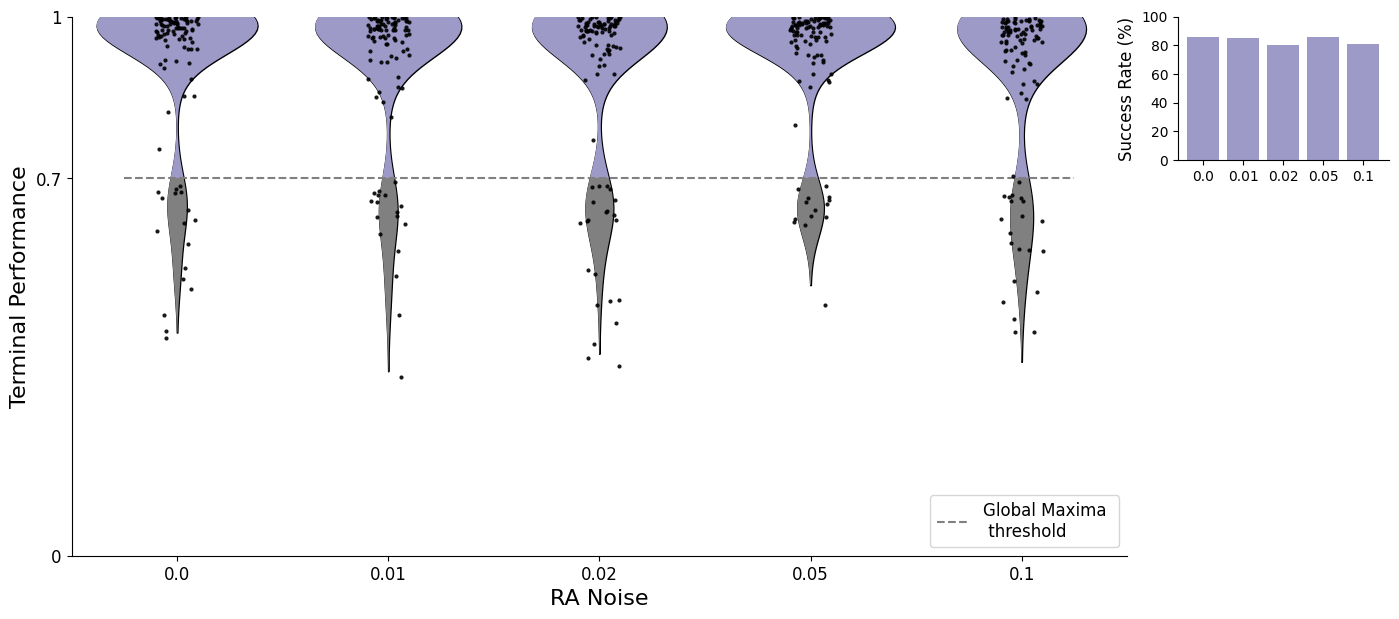

In [18]:
plot_results_violin(data_cut["RA_NOISE"], data_no_cut["RA_NOISE"], parameter_values["RA_NOISE"], "RA Noise")

In [19]:
# for directory in neighbouring_directories:
#     if directory in wanted_directories:
#         print(directory)
        
#         data_cut[directory] = np.load(os.path.join(directory, "overall_returns_cutoff.npy"))
#         data_no_cut[directory] = np.load(os.path.join(directory, "overall_returns_nocutoff.npy"))
#         parameter_values[directory] = np.load(os.path.join(directory, "parameter_values.npy"))
#         # violin plot
#         plot_results_violin(data_cut[directory], data_no_cut[directory], parameter_values[directory], directory)
        

In [20]:
# # def plot_returns(data, key):
# width = 0.055
# for index, directory in enumerate(neighbouring_directories):
#     if directory in wanted_directories:
#         param = directory
#         returns_cut = 100 * data_cut[directory]
#         returns_no_cut = 100 * data_no_cut[directory]
#         # is returns cut and no cut same? 
#         parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
#         print(parameter_values_sorted)
#         sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

#         # Arrange returns based on sorted parameter values
#         returns_cut = returns_cut[:, sorted_indices]
#         returns_no_cut = returns_no_cut[:, sorted_indices]

#         n_values = len(parameter_values_sorted)
#         above_threshold_cut = np.zeros(n_values)
#         above_threshold_no_cut = np.zeros(n_values)
#         for i in range(n_values):
#             above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
#             above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

#         above_threshold_cut /= returns_cut.shape[0]
#         above_threshold_no_cut /= returns_no_cut.shape[0]
#         plt.figure(figsize=(10,7))
#         # means = #np.mean(returns_cut, axis=0)

#         # Use plt.bar for means with error bars for std
#         plt.bar(np.arange(n_values)+width, 100*above_threshold_no_cut, label='before lesion', alpha=0.2, width=0.1, color='b')
#         plt.bar(np.arange(n_values)-width, 100*above_threshold_cut, label='after lesion', alpha=0.2, width=0.1, color='r')
#         for i in range(n_values):
#             plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.01, color='b')
#             plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.01, color='r')
#         plt.ylim(0, 100)
#         for i in range(n_values):
#             plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
#             plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
#         plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
#         plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
#         # plt.title(f'Performance for different values of {param}')
#         plt.xlabel(param)
#         plt.ylabel('Return %')
#         plt.tight_layout()
#         plt.legend()
#         plt.show()

In [21]:
# # def plot_returns(data, key):
# for index, directory in enumerate(neighbouring_directories):
#     if directory in wanted_directories:
#         param = directory
#         returns_cut = 100 * data_cut[directory]
#         returns_no_cut = 100 * data_no_cut[directory]
#         # is returns cut and no cut same? 
#         parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
#         print(parameter_values_sorted)
#         sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

#         # Arrange returns based on sorted parameter values
#         returns_cut = returns_cut[:, sorted_indices]
#         returns_no_cut = returns_no_cut[:, sorted_indices]

#         n_values = len(parameter_values_sorted)
#         above_threshold_cut = np.zeros(n_values)
#         above_threshold_no_cut = np.zeros(n_values)
#         for i in range(n_values):
#             above_threshold_cut[i] = np.sum(returns_cut[:, i] > 70)
#             above_threshold_no_cut[i] = np.sum(returns_no_cut[:, i] > 70)

#         above_threshold_cut /= returns_cut.shape[0]
#         above_threshold_no_cut /= returns_no_cut.shape[0]
#         plt.figure(figsize=(10,7))
#         # means = #np.mean(returns_cut, axis=0)

#         # Use plt.bar for means with error bars for std
#         plt.bar(range(n_values), 100*above_threshold_no_cut, label='before lesion', alpha=0.2, width=0.5, color='b')
#         plt.bar(range(n_values), 100*above_threshold_cut, label='after lesion', alpha=0.2, width=0.3, color='r')
#         for i in range(n_values):
#             plt.plot(i * np.ones_like(returns_cut[:, i]), returns_cut[:, i], 'x', alpha = 0.01, color='b')
#             plt.plot(i * np.ones_like(returns_no_cut[:, i]), returns_no_cut[:, i], '.', alpha = 0.01, color='r')
#         plt.ylim(0, 100)
#         for i in range(n_values):
#             plt.text(i, 71, f"Cut: {100*above_threshold_cut[i]:.2f} %", ha='center')
#             plt.text(i, 68, f"No: {100*above_threshold_no_cut[i]:.2f} %", ha='center')
#         plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
#         plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
#         plt.title(f'Performance for different values of {param}')
#         plt.xlabel(param)
#         plt.ylabel('Return %')
#         plt.legend()
#         plt.show()

Base model parameters
1. `JUMP_MID` = 0.6
2. `JUMP_SLOPE` >= 50 /* higher jump slope causes the night jump to pause when above threshold. Leading to stable model. */
3. `BG_NOISE` anything between 0.05 - 0.15 
4. `REWARD_WINDOW` = 5
5. `LEARNING_RATE_RL` = 0.2 best; 0.1 okay